In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.power import ttest_power
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import os
sns.set(color_codes=True)
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\SMDM Project')
mydata=pd.read_csv("Wholesale Customer.csv")

In [3]:
mydata.shape

(440, 9)

In [4]:
mydata.size

3960

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
mydata.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
mydata['Channel'].unique()

array(['Retail', 'Hotel'], dtype=object)

In [8]:
mydata['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [9]:
mydata['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [10]:
mydata['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

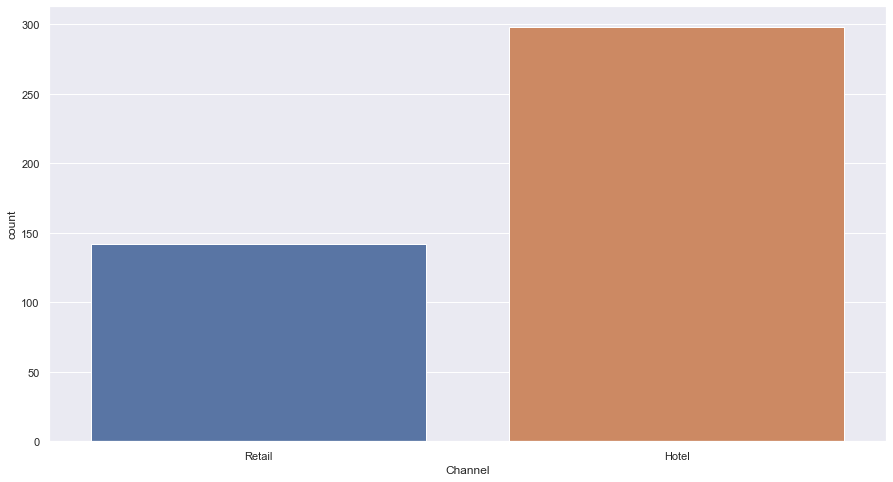

In [11]:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
sns.countplot(mydata['Channel']);

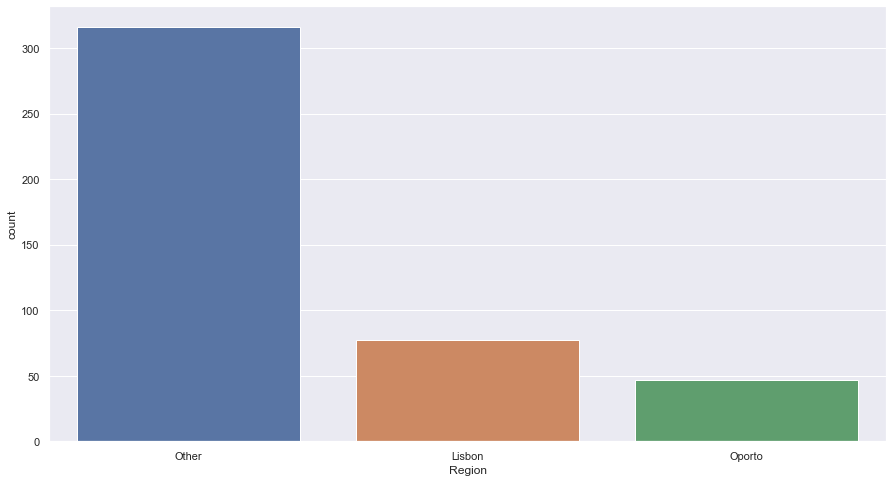

In [12]:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
sns.countplot(mydata['Region']);

In [13]:
mydata['Total Spend']=mydata['Fresh']+mydata['Milk']+mydata['Grocery']+mydata['Frozen']+mydata['Detergents_Paper']+mydata['Delicatessen']

In [14]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


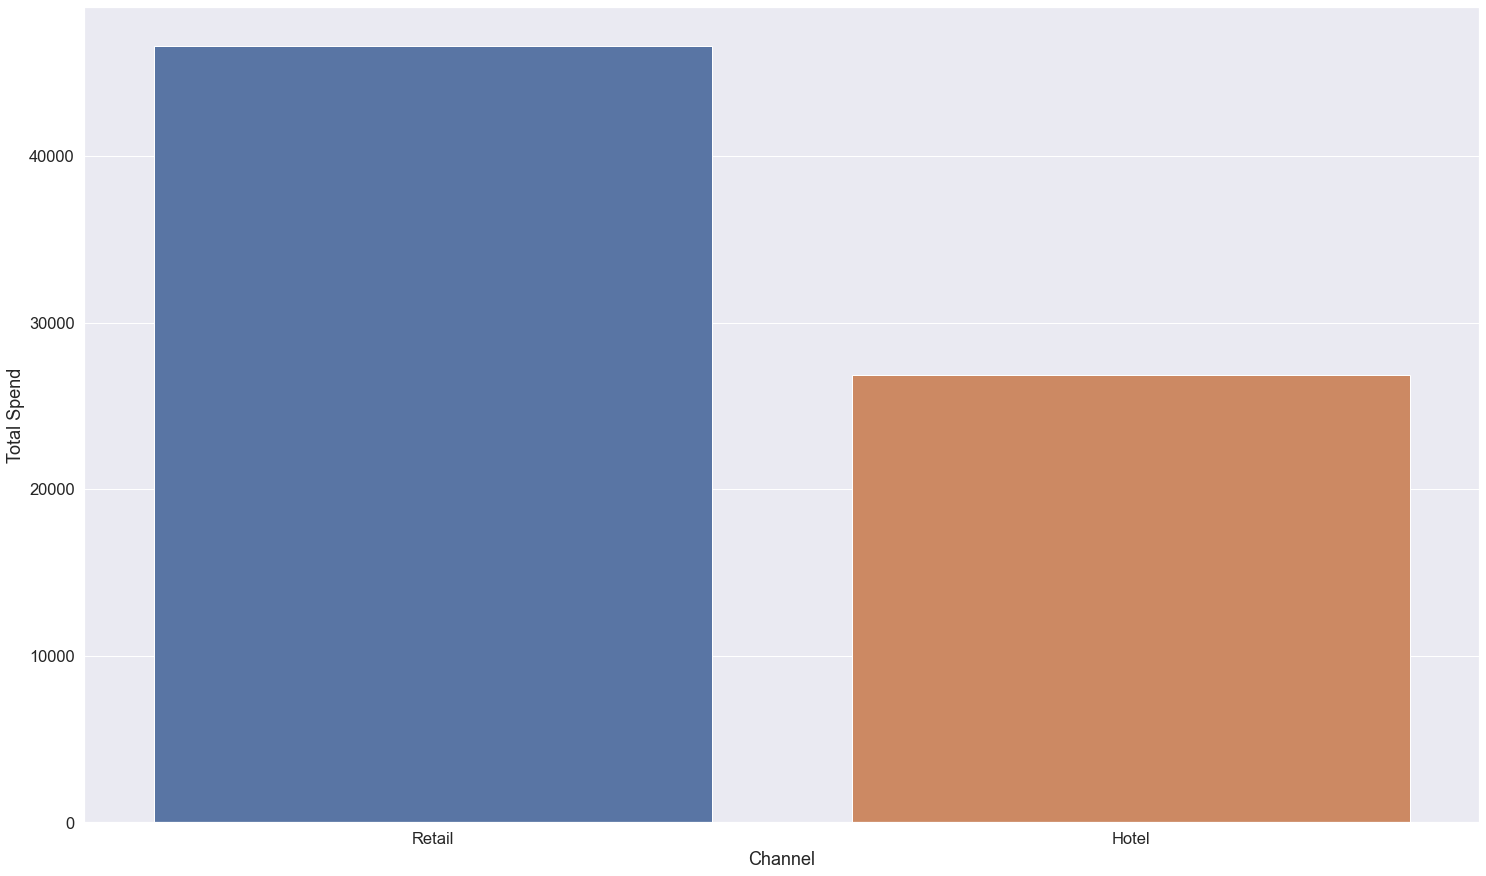

In [15]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.barplot(mydata['Channel'],mydata['Total Spend'],ci=None);

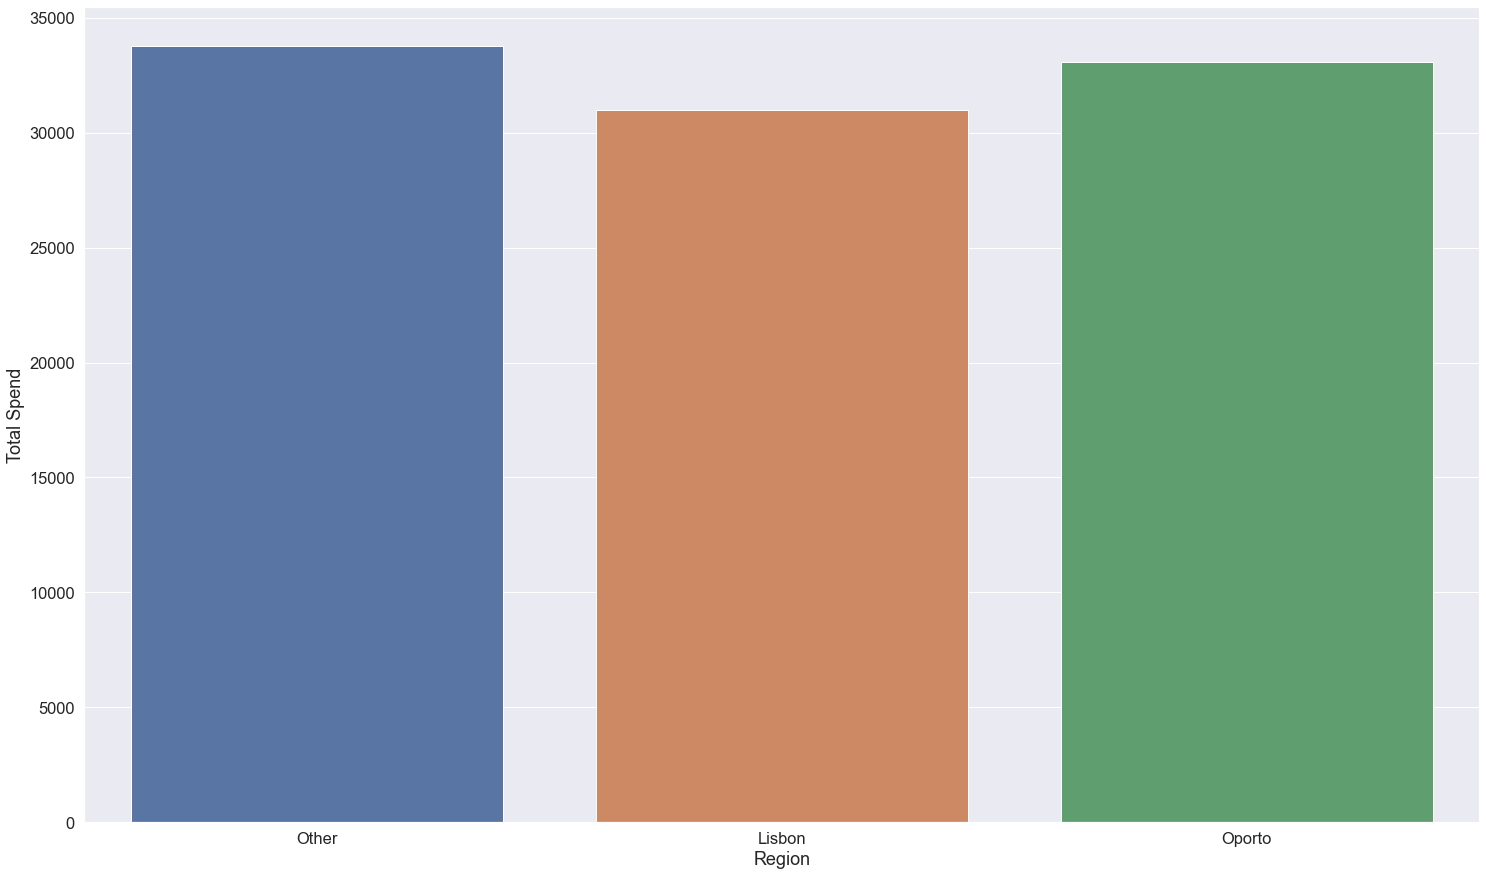

In [16]:
plt.figure(figsize=(25,15))
sns.set(font_scale=1.5)
sns.barplot(mydata['Region'],mydata['Total Spend'],ci=None);

In [17]:
df1=mydata[['Channel','Total Spend']].groupby('Channel').sum().round()
df1

,Total Spend
Channel,
Hotel,7999569
Retail,6619931


In [18]:
df2=mydata[['Channel','Total Spend']].groupby('Channel').mean().round()
df2

,Total Spend
Channel,
Hotel,26844.0
Retail,46619.0


In [19]:
df3=mydata[['Region','Total Spend']].groupby('Region').sum().round()
df3

,Total Spend
Region,
Lisbon,2386813
Oporto,1555088
Other,10677599


In [20]:
df4=mydata[['Region','Total Spend']].groupby('Region').mean().round()
df4

,Total Spend
Region,
Lisbon,30998.0
Oporto,33087.0
Other,33790.0


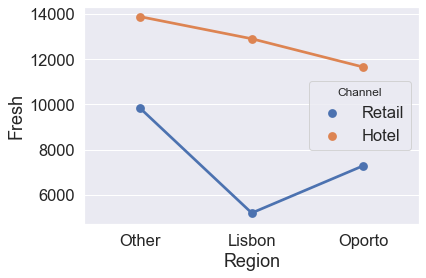

In [21]:
sns.pointplot(mydata['Region'],mydata['Fresh'],hue=mydata['Channel'],ci=False);

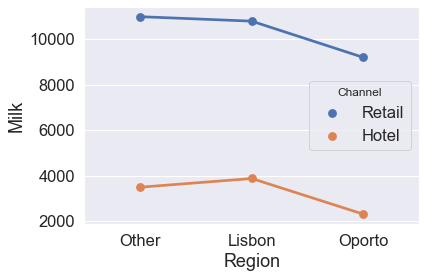

In [22]:
sns.pointplot(mydata['Region'],mydata['Milk'],hue=mydata['Channel'],ci=False);

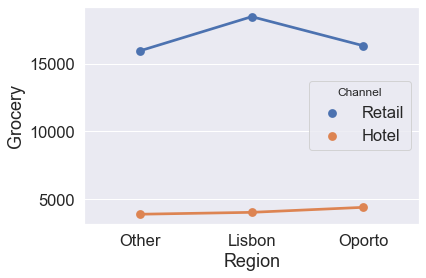

In [23]:
sns.pointplot(mydata['Region'],mydata['Grocery'],hue=mydata['Channel'],ci=False);

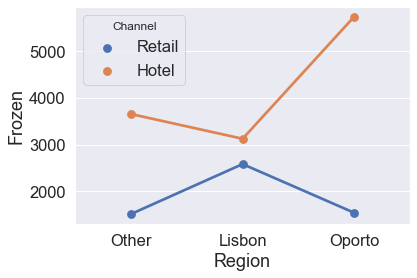

In [24]:
sns.pointplot(mydata['Region'],mydata['Frozen'],hue=mydata['Channel'],ci=False);

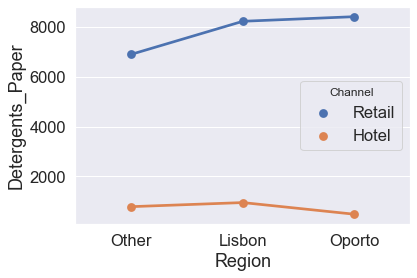

In [25]:
sns.pointplot(mydata['Region'],mydata['Detergents_Paper'],hue=mydata['Channel'],ci=False);

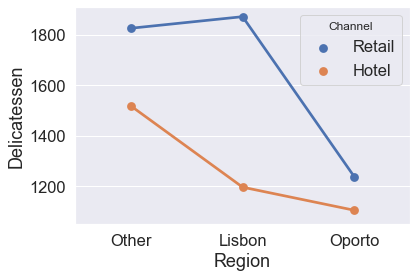

In [26]:
sns.pointplot(mydata['Region'],mydata['Delicatessen'],hue=mydata['Channel'],ci=False);

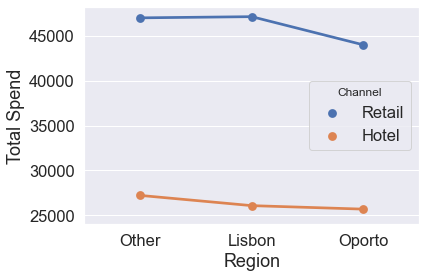

In [27]:
sns.pointplot(mydata['Region'],mydata['Total Spend'],hue=mydata['Channel'],ci=False);

In [28]:
mydata['Fresh'].std()

12647.328865076894

In [29]:
mydata.std()

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
Total Spend         26356.301730
dtype: float64

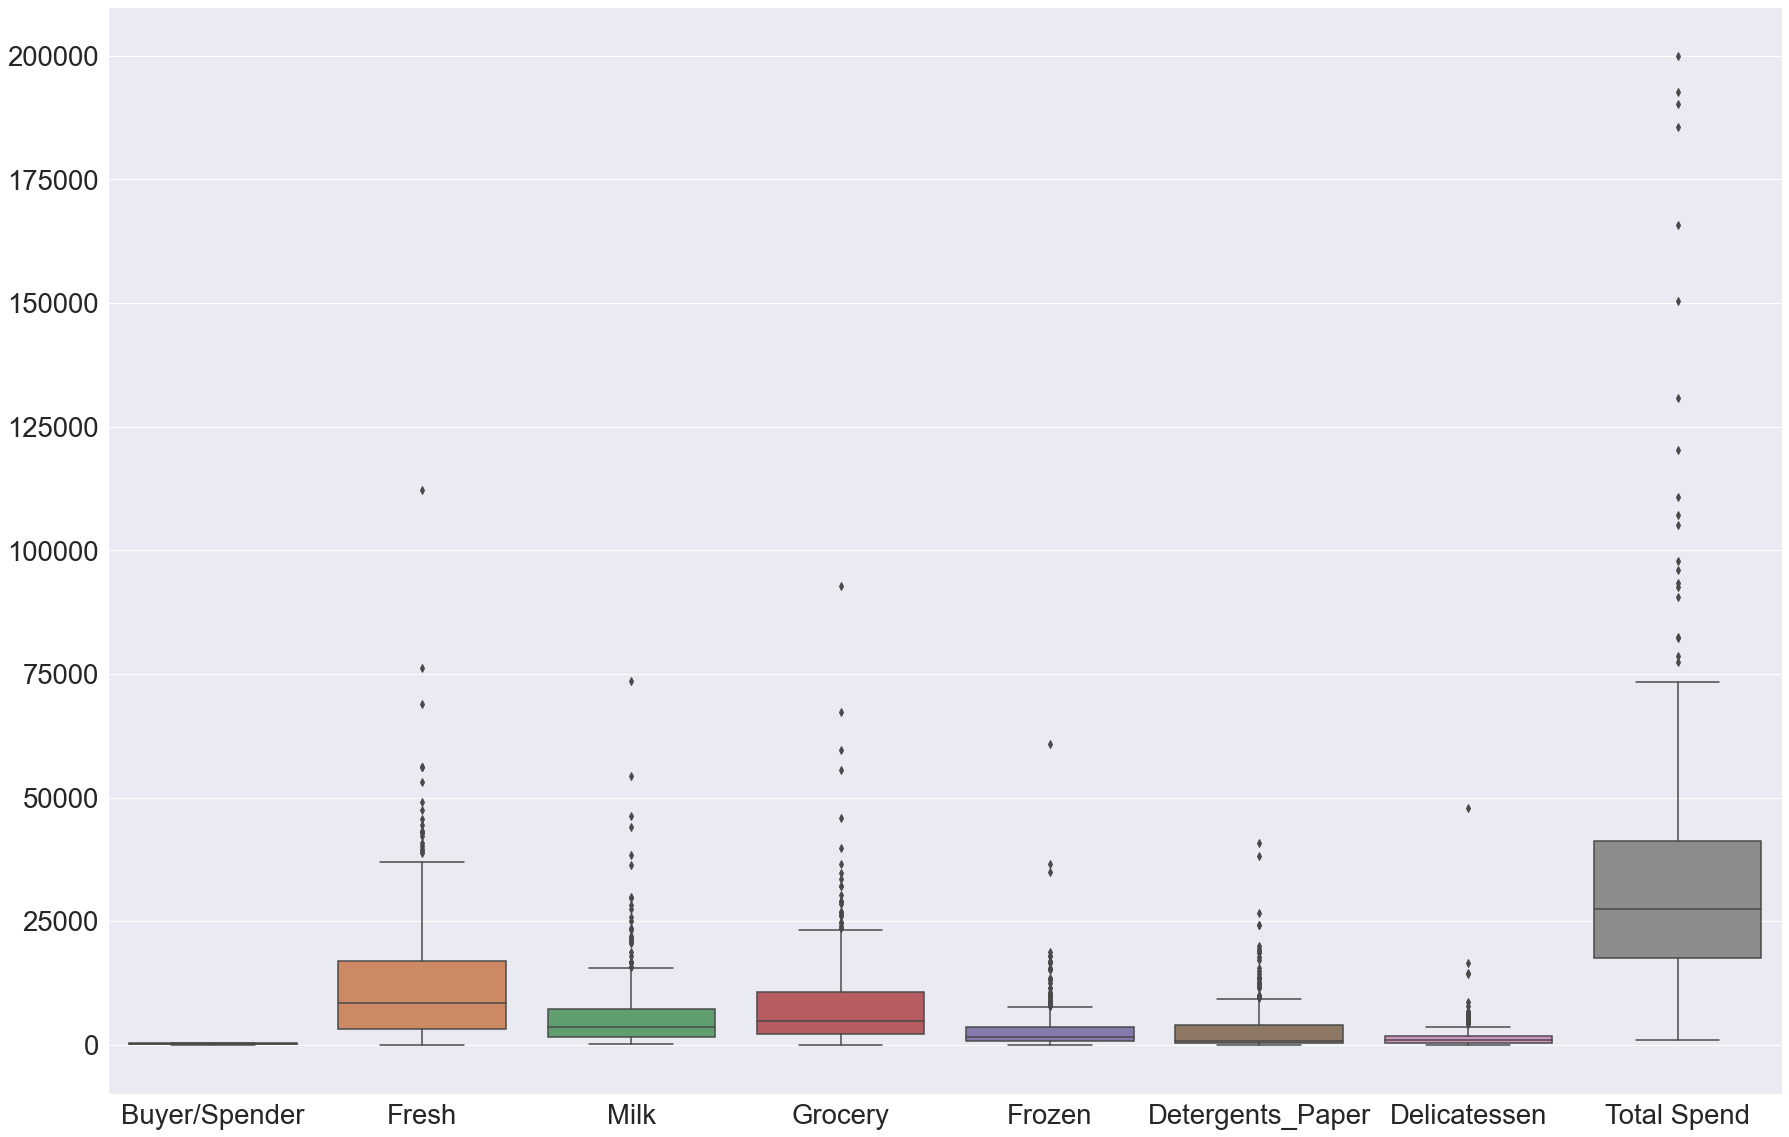

In [30]:
sns.set(font_scale=2.5)
plt.figure(figsize=(30,20))
sns.boxplot(data=mydata);

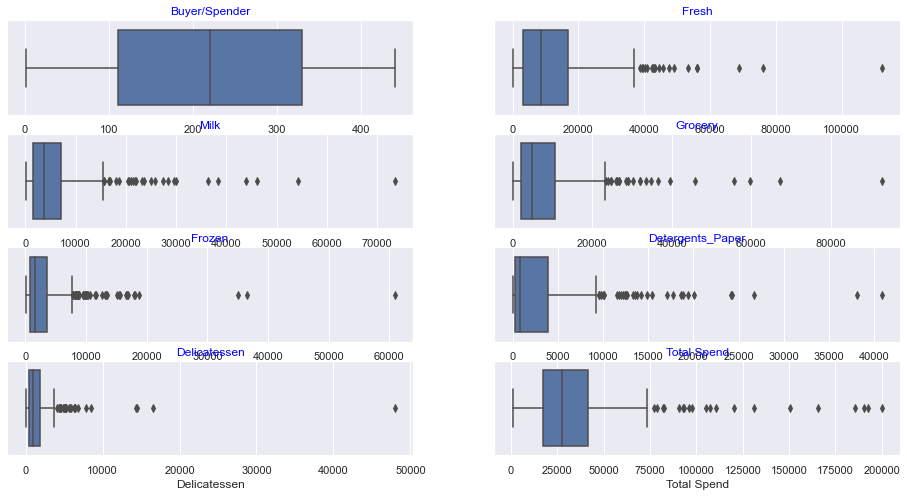

In [31]:
sns.set(font_scale=1)
data_plot=mydata[mydata.dtypes[mydata.dtypes!='object'].index]
fig=plt.figure(figsize=(16,8))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(4,2,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')

In [32]:
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\SMDM Project')
mydata1=pd.read_csv("Survey.csv")

In [33]:
mydata1.shape

(62, 14)

In [34]:
mydata1.size

868

In [35]:
mydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [36]:
mydata1.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [37]:
mydata1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [38]:
mydata1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [39]:
mydata1['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [40]:
df3=pd.crosstab(mydata1['Gender'],mydata1['Major'])
df3

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [41]:
df3['sum']=df3.sum(axis=1)
df3

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,sum
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29


In [42]:
df3.loc['Total']= df3.sum()
df3

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,sum
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [43]:
df4=pd.crosstab(mydata1['Gender'],mydata1['Grad Intention'])
df4

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [44]:
df4['sum']=df4.sum(axis=1)
df4

Grad Intention,No,Undecided,Yes,sum
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29


In [45]:
df4.loc['Total']= df4.sum()
df4

Grad Intention,No,Undecided,Yes,sum
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [46]:
df5=pd.crosstab(mydata1['Gender'],mydata1['Employment'])
df5

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [47]:
df5['sum']=df5.sum(axis=1)
df5

Employment,Full-Time,Part-Time,Unemployed,sum
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29


In [48]:
df5.loc['Total']= df5.sum()
df5

Employment,Full-Time,Part-Time,Unemployed,sum
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [49]:
df6=pd.crosstab(mydata1['Gender'],mydata1['Computer'])
df6

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [50]:
df6['sum']=df6.sum(axis=1)
df6

Computer,Desktop,Laptop,Tablet,sum
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29


In [51]:
df6.loc['Total']= df6.sum()
df6

Computer,Desktop,Laptop,Tablet,sum
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [52]:
#Contigency Tables are as shown below;

In [53]:
#2.1.1. Gender and Major
df3

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,sum
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [54]:
#2.1.2. Gender and Grad Intention
df4

Grad Intention,No,Undecided,Yes,sum
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [55]:
#2.1.3. Gender and Employment
df5

Employment,Full-Time,Part-Time,Unemployed,sum
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [56]:
#2.1.4. Gender and Computer
df6

Computer,Desktop,Laptop,Tablet,sum
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [57]:
#2.2.1 What is the probability that a randomly selected CMSU student will be male?
Female=33
Male=29
Total=62
Prob_Male = round(Male/Total,4)*100
print('Probability that randomly selected CMSU student will be male is %1.1f' % Prob_Male +'%')

Probability that randomly selected CMSU student will be male is 46.8%


In [58]:
#2.2.2 What is the probability that a randomly selected CMSU student will be female?
Prob_Female = round(Female/Total,4)*100
print('Probability that randomly selected CMSU student will be Female is %1.1f' % Prob_Female +'%')

Probability that randomly selected CMSU student will be Female is 53.2%


In [59]:
#2.3.1 Find the conditional probability of different majors among the male students in CMSU.
Acc_Male=4
CIS_Male=1
Eco_Fin_Male=4
IB_Male=2
Mgmt_Male=6
Other_Male=4
Ret_Mktg_Male=5
Undecided_Male=3
Prob_Acc_Prob_Male=round(Acc_Male/Male,4)*100
Prob_CIS_Prob_Male=round(CIS_Male/Male,4)*100
Prob_Eco_Fin_Prob_Male=round(Eco_Fin_Male/Male,4)*100
Prob_IB_Prob_Male=round(IB_Male/Male,4)*100
Prob_Mgmt_Prob_Male=round(Mgmt_Male/Male,4)*100
Prob_Other_Prob_Male=round(Other_Male/Male,4)*100
Prob_Ret_Mktg_Prob_Male=round(Ret_Mktg_Male/Male,4)*100
Prob_Undecided_Prob_Male=round(Undecided_Male/Male,4)*100
print('Conditional Probability male accounting student is %1.1f' % Prob_Acc_Prob_Male +'%')
print('Conditional Probability male CIS student is %1.1f' % Prob_CIS_Prob_Male +'%')
print('Conditional Probability male eco finance student is %1.1f' % Prob_Eco_Fin_Prob_Male +'%')
print('Conditional Probability male IB student is %1.1f' % Prob_IB_Prob_Male +'%')
print('Conditional Probability male management student is %1.1f' % Prob_Mgmt_Prob_Male +'%')
print('Conditional Probability male other specialisation student is %1.1f' % Prob_Other_Prob_Male +'%')
print('Conditional Probability male retail marketing student is %1.1f' % Prob_Ret_Mktg_Prob_Male +'%')
print('Conditional Probability male undecided student is %1.1f' % Prob_Undecided_Prob_Male +'%')

Conditional Probability male accounting student is 13.8%
Conditional Probability male CIS student is 3.5%
Conditional Probability male eco finance student is 13.8%
Conditional Probability male IB student is 6.9%
Conditional Probability male management student is 20.7%
Conditional Probability male other specialisation student is 13.8%
Conditional Probability male retail marketing student is 17.2%
Conditional Probability male undecided student is 10.3%


In [60]:
#2.3.2 Find the conditional probability of different majors among the female students of CMSU.
Acc_Female=3
CIS_Female=3
Eco_Fin_Female=7
IB_Female=4
Mgmt_Female=4
Other_Female=3
Ret_Mktg_Female=9
Undecided_Female=0
Prob_Acc_Prob_Female=round(Acc_Female/Female,4)*100
Prob_CIS_Prob_Female=round(CIS_Female/Female,4)*100
Prob_Eco_Fin_Prob_Female=round(Eco_Fin_Female/Female,4)*100
Prob_IB_Prob_Female=round(IB_Female/Female,4)*100
Prob_Mgmt_Prob_Female=round(Mgmt_Female/Female,4)*100
Prob_Other_Prob_Female=round(Other_Female/Female,4)*100
Prob_Ret_Mktg_Prob_Female=round(Ret_Mktg_Female/Female,4)*100
Prob_Undecided_Prob_Female=round(Undecided_Female/Female,4)*100
print('Conditional Probability Female accounting student is %1.1f' % Prob_Acc_Prob_Female +'%')
print('Conditional Probability Female CIS student is %1.1f' % Prob_CIS_Prob_Female +'%')
print('Conditional Probability Female eco finance student is %1.1f' % Prob_Eco_Fin_Prob_Female +'%')
print('Conditional Probability Female IB student is %1.1f' % Prob_IB_Prob_Female +'%')
print('Conditional Probability Female management student is %1.1f' % Prob_Mgmt_Prob_Female +'%')
print('Conditional Probability Female other specialisation student is %1.1f' % Prob_Other_Prob_Female +'%')
print('Conditional Probability Female retail marketing student is %1.1f' % Prob_Ret_Mktg_Prob_Female +'%')
print('Conditional Probability Female undecided student is %1.1f' % Prob_Undecided_Prob_Female +'%')

Conditional Probability Female accounting student is 9.1%
Conditional Probability Female CIS student is 9.1%
Conditional Probability Female eco finance student is 21.2%
Conditional Probability Female IB student is 12.1%
Conditional Probability Female management student is 12.1%
Conditional Probability Female other specialisation student is 9.1%
Conditional Probability Female retail marketing student is 27.3%
Conditional Probability Female undecided student is 0.0%


In [61]:
#2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.
Male_Grad=17
Total=62
Prob_Male_Grad=round(Male_Grad/Total,4)*100
print('Probability that we get a male indenting to graduate is %1.1f' % Prob_Male_Grad +'%')

Probability that we get a male indenting to graduate is 27.4%


In [62]:
#2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.
Female_Nolaptop=4
Total=62
Prob_Female_Nolaptop=round(Female_Nolaptop/Total,4)*100
print('Probability that we get a female not having a laptop is %1.1f' % Prob_Female_Nolaptop +'%')

Probability that we get a female not having a laptop is 6.5%


In [63]:
#2.5.1 Find the probability that a randomly chosen student is either a male or has a full-time employment
Full_Employment=10
Male_Full_Employment=7
Prob_Male_or_Full_Employment=round((Male+Full_Employment-Male_Full_Employment)/Total,4)*100
print('Probability that we get a male or a full time employee is %1.1f' % Prob_Male_or_Full_Employment +'%')

Probability that we get a male or a full time employee is 51.6%


In [64]:
#2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.
Prob_IB_or_Mgmt_Female=round((IB_Female+Mgmt_Female)/Female,4)*100
print('Conditional Probability Female IB or Management student is %1.1f' % Prob_IB_or_Mgmt_Female +'%')

Conditional Probability Female IB or Management student is 24.2%


In [65]:
#2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?
df7=pd.crosstab(mydata1['Gender'],mydata1['Grad Intention'])
df7

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [66]:
df8=df7.drop(['Undecided'], axis=1)
df8

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [67]:
chhi2, pval, dof, exp_freq=chi2_contingency(df8)
pval

0.08449793972392967

In [68]:
#since pval>0.05, we can conclude at 95% confidence level that graduate intention is independent of being female.

In [69]:
#2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
mydata1['GPA'].mean()

3.129032258064516

In [70]:
mydata1['GPA'].std()

0.3773883926969118

In [71]:
stats.norm.cdf(3,loc=3.129032258064516,scale=0.3773883926969118)

0.3662099174094998

In [72]:
#Probability that GPA of a randomly selected student is less than 3 is 0.3662099174094998

In [73]:
#2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.
mydata_new1=mydata1[mydata1['Gender']=='Female']
mydata_new1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
20,21,Female,22,Junior,Retailing/Marketing,Undecided,3.2,Part-Time,55.0,1,3,690,Laptop,50


In [74]:
mydata_new2=mydata1[mydata1['Gender']=='Male']
mydata_new2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
12,13,Male,22,Senior,International Business,Undecided,3.4,Part-Time,40.0,2,3,400,Desktop,45
13,14,Male,22,Senior,International Business,Undecided,3.1,Part-Time,40.0,1,3,400,Laptop,150
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
15,16,Male,24,Senior,Management,Undecided,3.4,Part-Time,45.0,4,4,500,Laptop,175
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300


In [75]:
mydata_new1['Salary'].mean()

48.78787878787879

In [76]:
mydata_new1['Salary'].std()

13.272404585637391

In [77]:
mydata_new2['Salary'].mean()

48.275862068965516

In [78]:
mydata_new2['Salary'].std()

10.79317427068786

In [79]:
#conditional probability that a randomly selected Female earns 50 or more
1-stats.norm.cdf(50,loc=48.78787878787879,scale=13.272404585637391)

0.4636166122959239

In [80]:
#conditional probability that a randomly selected Male earns 50 or more
1-stats.norm.cdf(50,loc=48.275862068965516,scale=10.79317427068786)

0.43654162126831253

In [81]:
#2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

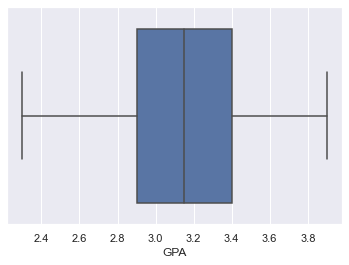

In [82]:
figsize = (20, 10)
sns.boxplot(mydata1['GPA']);

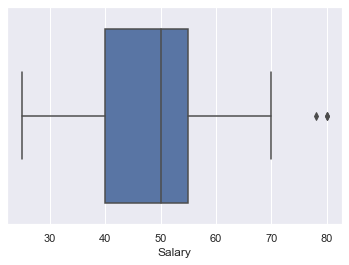

In [83]:
figsize = (20, 10)
sns.boxplot(mydata1['Salary']);

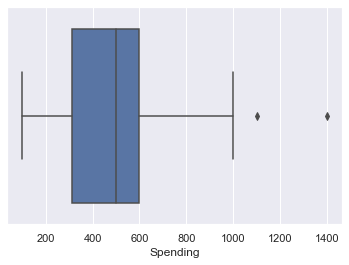

In [84]:
figsize = (20, 10)
sns.boxplot(mydata1['Spending']);

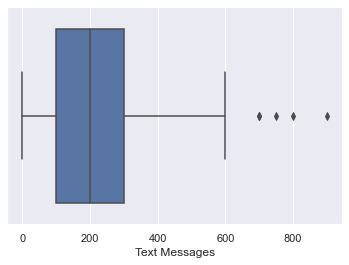

In [85]:
figsize = (20, 10)
sns.boxplot(mydata1['Text Messages']);

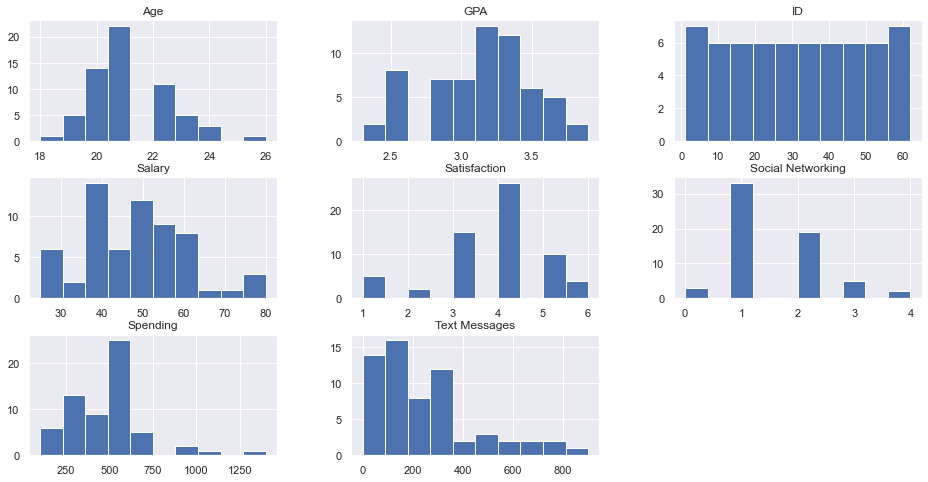

In [86]:
mydata1.hist(figsize=(16,8));

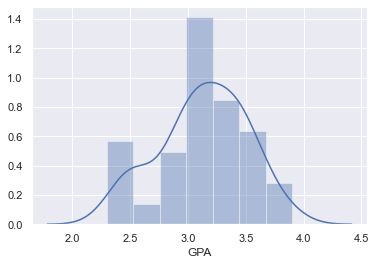

In [87]:
sns.distplot(mydata1['GPA']);

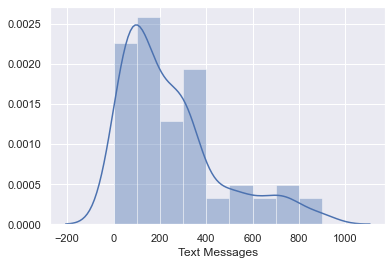

In [88]:
sns.distplot(mydata1['Text Messages']);

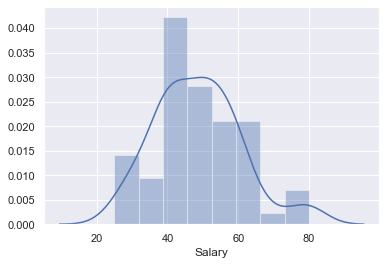

In [89]:
sns.distplot(mydata1['Salary']);

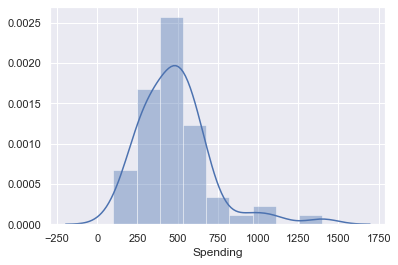

In [90]:
sns.distplot(mydata1['Spending']);

In [91]:
os.chdir('C:\\Users\\Vikas\\Desktop\\Thankappan\\GREAT LAKES DS&BA\\ref\\SMDM Project')
mydata2=pd.read_csv("A & B Shingles.csv")

In [92]:
mydata2.shape

(36, 2)

In [93]:
mydata2.size

72

In [94]:
mydata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [95]:
mydata2.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [96]:
mydata2.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [97]:
mydata2['A'].mean()

0.3166666666666666

In [98]:
mydata2['A'].std()

0.13573082605973166

In [99]:
mydata2['B'].mean()

0.2735483870967742

In [100]:
mydata2['B'].std()

0.13729647694185443

In [108]:
#3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps

In [109]:
# Formulating the hypothesis for sample A
# H0 : 𝜇A <= 0.35
# H1 : 𝜇A > 0.35
# 1 sample t-test (RTT) for doing measurements on sample A

In [110]:
t_statistic,p_value=ttest_1samp(mydata2['A'],0.35)
print('t-statistic is %1.3f'% t_statistic)
print('p-value for RTT:',p_value)

t-statistic is -1.474
p-value for RTT: 0.14955266289815025


In [111]:
#Since the p-value is greater than 0.05, we cannot reject null hypothesis at 95% confidence level

In [112]:
# Formulating the hypothesis for sample B
# H0 : 𝜇B <= 0.35
# H1 : 𝜇B > 0.35
# 1 sample t-test (RTT) for doing measurements on sample B

In [115]:
t_statistic,p_value=ttest_1samp(mydata2['B'],0.35,nan_policy = 'omit')
print('t-statistic is %1.3f'% t_statistic)
print('p-value for RTT:',p_value)

t-statistic is -3.100
p-value for RTT: 0.004180954800638365


In [ ]:
#Since the p-value is lesser than 0.05, we  reject null hypothesis at 95% confidence level. 
#Hence it can be safely concluded that moisture content of sample B is not within permissible limits.

In [104]:
#3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [105]:
# Formulating the hypothesis
# H0 : 𝜇A = 𝜇B
# H1 : 𝜇A =! 𝜇B
# 2 sample t-test (2 tail) for doing measurements on two different sets of data

In [106]:
t_statistic,p_value=ttest_ind(mydata2['A'],mydata2['B'],nan_policy = 'omit')
print('t-statistic is %1.3f'% t_statistic)
print('p-value for two tail:',p_value)

t-statistic is 1.290
p-value for two tail: 0.2017496571835306


In [107]:
#Since the p-value is greater than 0.05, we cannot reject null hypothesis at 95% confidence level